# Temporal Geographical Evolution of Popular Neighborhoods
### Motivating Questions
- Where are popular businesses geographically concentrated?
- Can we gain insight into what areas will become popular if we analyze the temporal evolution of popularity?

### Goals
- Produce GIF visuals of the spatial distributions of popular businesses in select cities
- Justify using location of business as feature in ML model and what level of specificity is best (lat/long? neighborhood? city?).

In [ ]:
#TEST COMMENT 

In [2]:
import json
import powerlaw
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib.gridspec as gridspec 
import collections
import csv
import networkx as nx
from networkx.algorithms import community
import datetime
%matplotlib inline

## Step 1:
### Construct dataframe with business location and popularity and look at business popularity distribution

In [3]:
# Read in business data

Yelp_Business = pd.read_json('YelpDataset/business.json',lines=True)

In [4]:
# make dataframe with business location and rating data
# defining popularity as stars*no_of_reviews

rating_data=Yelp_Business[['latitude','longitude','stars','review_count']]
rating_data['popularity']=rating_data['stars']*rating_data['review_count']

/opt/condaenvs/jupyterhub/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [5]:
rating_data.head(20)

,latitude,longitude,stars,review_count,popularity
0,33.330690,-111.978599,4.0,22,88.0
1,40.291685,-80.104900,3.0,11,33.0
2,33.524903,-112.115310,1.5,18,27.0
3,33.383147,-111.964725,3.0,9,27.0
4,41.119535,-81.475690,3.5,116,406.0
5,48.727200,9.147950,4.0,5,20.0
6,36.207430,-115.268460,4.0,5,20.0
7,36.197484,-115.249660,1.5,9,13.5
8,40.615102,-80.091349,5.0,15,75.0
9,36.055825,-115.046350,5.0,7,35.0


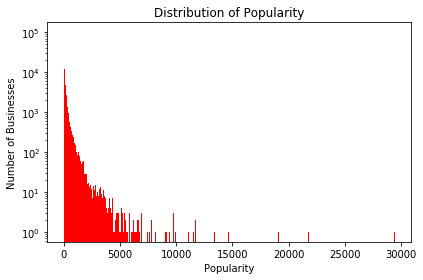

In [25]:
# distribution of the popularity of businesses

x1 = rating_data['popularity']
y = 800
fig, ax = plt.subplots()
ax.set_facecolor('xkcd:white')
plt.title('Distribution of Popularity')
plt.xlabel("Popularity")
plt.ylabel("Number of Businesses")
plt.hist(x1, bins = 800, facecolor = 'red',log=True)
plt.tight_layout()
plt.savefig("busPop.png")
plt.show()

## Step 2
### Visualize spatial business popularity distribution for select cities w/o analyzing its evolution over time
- First visuals in yellow show business concentrations in Las Vegas, Phoenix, Toronto, and Charlotte
- Subsequent visuals titled "[City] Very Popular Businesses" show spectrum of business popularity

/opt/condaenvs/jupyterhub/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


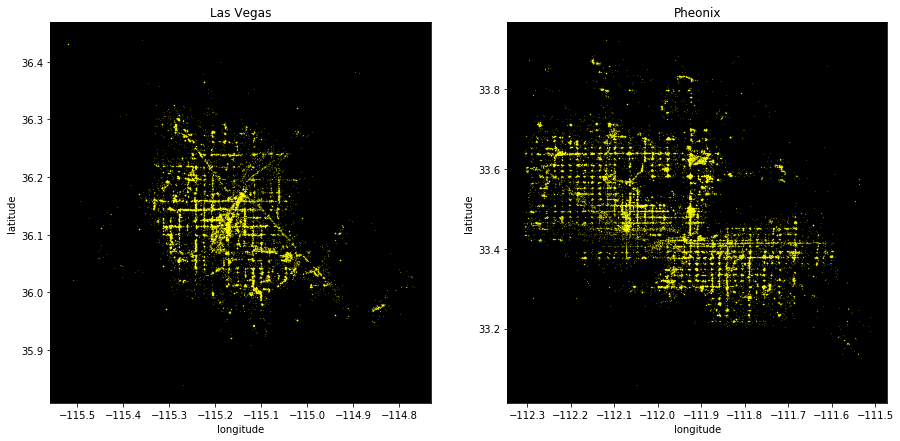

In [6]:
# LAS VEGAS AND PHOENIX



f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

#a random point inside vegas
lat = 36.207430
lon = -115.268460
#some adjustments to get the right pic
lon_min, lon_max = lon-0.3,lon+0.5
lat_min, lat_max = lat-0.4,lat+0.5
#subset for vegas
ratings_data_vegas=rating_data[(rating_data["longitude"]>lon_min) &\
                    (rating_data["longitude"]<lon_max) &\
                    (rating_data["latitude"]>lat_min) &\
                    (rating_data["latitude"]<lat_max)]

#Facet scatter plot
ratings_data_vegas.plot(kind='scatter', x='longitude', y='latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Las Vegas")
ax1.set_facecolor('black')

#a random point inside pheonix
lat = 33.435463
lon = -112.006989
#some adjustments to get the right pic
lon_min, lon_max = lon-0.3,lon+0.5
lat_min, lat_max = lat-0.4,lat+0.5
#subset for pheonix
ratings_data_pheonix=rating_data[(rating_data["longitude"]>lon_min) &\
                    (rating_data["longitude"]<lon_max) &\
                    (rating_data["latitude"]>lat_min) &\
                    (rating_data["latitude"]<lat_max)]
#plot pheonix
ratings_data_pheonix.plot(kind='scatter', x='longitude', y='latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Pheonix")
ax2.set_facecolor('black')
f.show()

/opt/condaenvs/jupyterhub/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


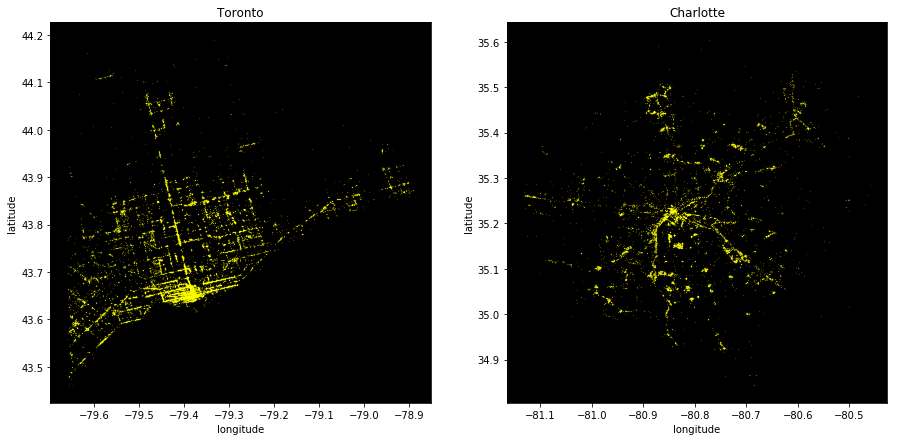

In [7]:
# TORONTO AND CHARLOTTE



f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
#43.6532° N, 79.3832° W
#a random point inside toronto
lat = 43.729020
lon = -79.359342
#some adjustments to get the right pic
lon_min, lon_max = lon-0.3,lon+0.5
lat_min, lat_max = lat-0.4,lat+0.5
#subset for vegas
ratings_data_toronto=rating_data[(rating_data["longitude"]>lon_min) &\
                    (rating_data["longitude"]<lon_max) &\
                    (rating_data["latitude"]>lat_min) &\
                    (rating_data["latitude"]<lat_max)]

#Facet scatter plot
ratings_data_toronto.plot(kind='scatter', x='longitude', y='latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Toronto")
ax1.set_facecolor('black')

#a random point inside charlotte
lat = 35.212330
lon = -80.831255

#35.2271° N, 80.8431° W


#some adjustments to get the right pic
lon_min, lon_max = lon-0.3,lon+0.5
lat_min, lat_max = lat-0.4,lat+0.5
#subset for pheonix
ratings_data_charlotte=rating_data[(rating_data["longitude"]>lon_min) &\
                    (rating_data["longitude"]<lon_max) &\
                    (rating_data["latitude"]>lat_min) &\
                    (rating_data["latitude"]<lat_max)]
#plot pheonix
ratings_data_charlotte.plot(kind='scatter', x='longitude', y='latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Charlotte")
ax2.set_facecolor('black')
f.show()

In [8]:
# Splitting up into different dataframes based off of popularity spectrum

# I felt that the values 10, 100, 500, and 1000 split the business popularity power law distribution into 
# representative chunks, although different values produce different spatial distributions

rating_data10 = rating_data[rating_data['popularity']<10]
rating_data100 = rating_data[(rating_data['popularity']<100) & (rating_data['popularity']>=10)]
rating_data500 = rating_data[(rating_data['popularity']<500) & (rating_data['popularity']>=100)]
rating_data1000 = rating_data[rating_data['popularity']>=1000]
ratingArrayOverall = [rating_data10,rating_data100,rating_data500,rating_data1000]

/opt/condaenvs/jupyterhub/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/opt/condaenvs/jupyterhub/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/opt/condaenvs/jupyterhub/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/opt/condaenvs/jupyterhub/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


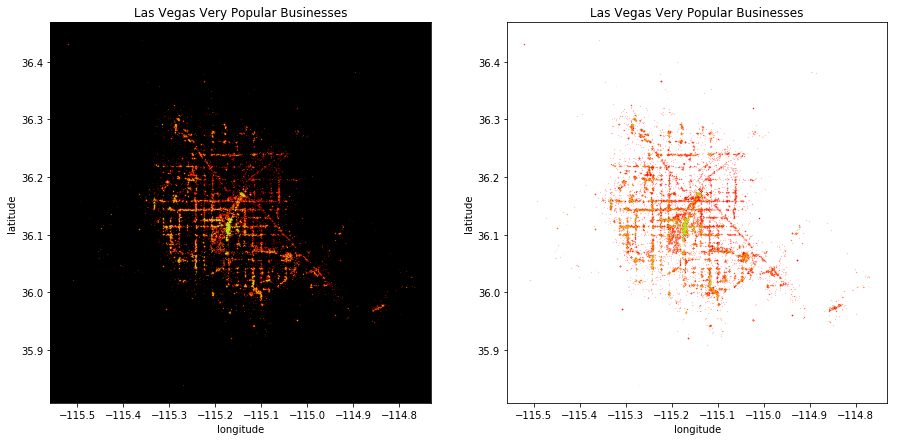

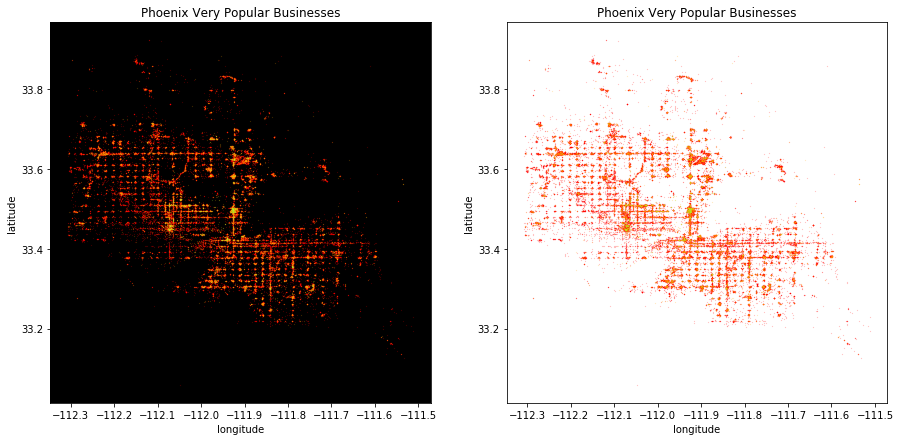

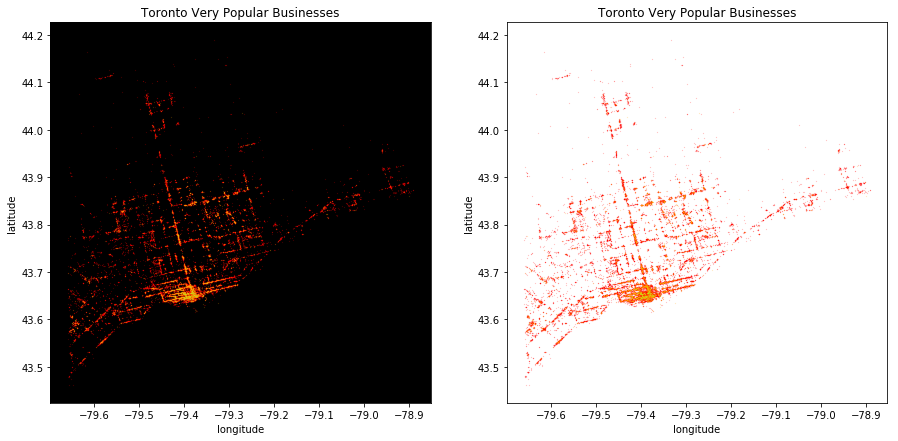

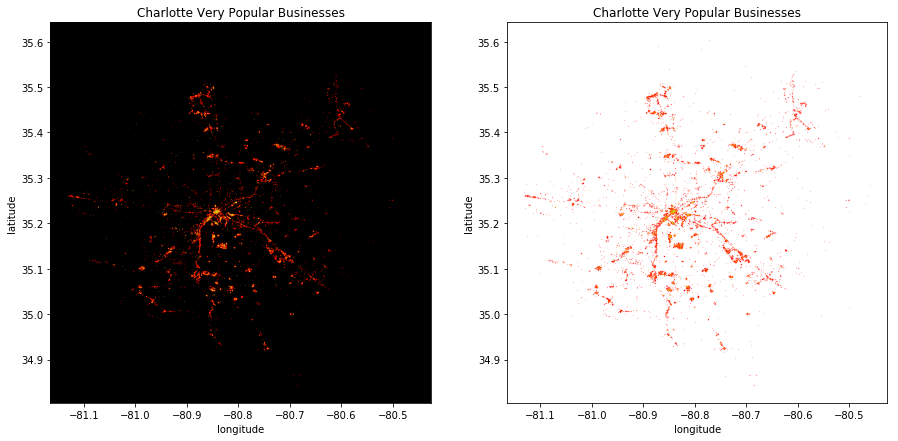

In [12]:
def makeYearReviewMap(cityCentLat,cityCentLong,arrDfPopularitySep,cityString):
    # This method computes a popularity map for a city
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
    
    #some adjustments to get the right pic
    lon_min, lon_max = cityCentLong-0.3,cityCentLong+0.5
    lat_min, lat_max = cityCentLat-0.4,cityCentLat+0.5
    
    arrDfCityPopularitySep = []
    
    count = 0
    for el in arrDfPopularitySep:
        #print(str(count))
        localDf = arrDfPopularitySep[count]
        arrDfCityPopularitySep.append(localDf[(localDf["longitude"]>lon_min) &\
                        (localDf["longitude"]<lon_max) &\
                        (localDf["latitude"]>lat_min) &\
                        (localDf["latitude"]<lat_max)])
        count += 1
    
    arrDfCityPopularitySep[0].plot(kind='scatter', x='longitude', y='latitude',
                color='red', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
    arrDfCityPopularitySep[1].plot(kind='scatter', x='longitude', y='latitude',
                color='red', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
    arrDfCityPopularitySep[2].plot(kind='scatter', x='longitude', y='latitude',
                color='orange', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
    arrDfCityPopularitySep[3].plot(kind='scatter', x='longitude', y='latitude',
                color='greenyellow', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
    ax1.set_title(cityString+ " Very Popular Businesses")
    ax1.set_facecolor('black')

    arrDfCityPopularitySep[0].plot(kind='scatter', x='longitude', y='latitude',
                color='red', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
    arrDfCityPopularitySep[1].plot(kind='scatter', x='longitude', y='latitude',
                color='red', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
    arrDfCityPopularitySep[2].plot(kind='scatter', x='longitude', y='latitude',
                color='orange', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
    arrDfCityPopularitySep[3].plot(kind='scatter', x='longitude', y='latitude',
                color='greenyellow', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
    ax2.set_title(cityString+ " Very Popular Businesses")
    ax2.set_facecolor('white')
    f.show()
    
makeYearReviewMap(36.207430,-115.268460,ratingArrayOverall,"Las Vegas") 
makeYearReviewMap(33.435463,-112.006989,ratingArrayOverall,"Phoenix")
makeYearReviewMap(43.729020,-79.359342,ratingArrayOverall,"Toronto") 
makeYearReviewMap(35.212330,-80.831255,ratingArrayOverall,"Charlotte")

## Step 3
### Add temporal component (year)
- I chose to split the ratings by year given the constraints of the data, but with more data, smaller time units can be chosen
- Cumulative approach: each year will take into account the rating data up to specified year (i.e. 2006 -> 2004-2006, 2014 -> 2004-2014)
- Can also attempt similar model where we consider reviews only by year (not cumulative) to see yearly changes

In [9]:
# reading in reviews by year
reviews2004 = pd.read_csv("ReviewsByYear/reviews2004.csv")
reviews2005 = pd.read_csv("ReviewsByYear/reviews2005.csv")
reviews2006 = pd.read_csv("ReviewsByYear/reviews2006.csv")
reviews2007 = pd.read_csv("ReviewsByYear/reviews2007.csv")
reviews2008 = pd.read_csv("ReviewsByYear/reviews2008.csv")
reviews2009 = pd.read_csv("ReviewsByYear/reviews2009.csv")
reviews2010 = pd.read_csv("ReviewsByYear/reviews2010.csv")
reviews2011 = pd.read_csv("ReviewsByYear/reviews2011.csv")
reviews2012 = pd.read_csv("ReviewsByYear/reviews2012.csv")
reviews2013 = pd.read_csv("ReviewsByYear/reviews2013.csv")
reviews2014 = pd.read_csv("ReviewsByYear/reviews2014.csv")
reviews2015 = pd.read_csv("ReviewsByYear/reviews2015.csv")
reviews2016 = pd.read_csv("ReviewsByYear/reviews2016.csv")
reviews2017 = pd.read_csv("ReviewsByYear/reviews2017.csv")



/opt/condaenvs/jupyterhub/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
reviews2017.head()

,Unnamed: 0,business_id,cool,date,funny,review_id,stars,text,useful,user_id,year of review,latitude of business,longitude of business
0,34,3E5umUqaU5OZAV3jNLW3kQ,0,2017-11-02,0.0,7GsVl-wMaSfG1VoEK6-s6g,4.0,Great place to bring dogs! It's really a dog p...,0.0,u0LXt3Uea_GidxRW1xcsfg,2017.0,43.663361,-79.329323
1,44,l1_S1mfGbEMxfT1f9omhEA,0,2017-10-16,0.0,Ebggx4Zlc4VWReJMG1nT6w,1.0,Terrible service and not so great drinks.\n\nW...,0.0,u0LXt3Uea_GidxRW1xcsfg,2017.0,43.804481,-79.287782
2,50,vcxvQyAggPqxcHwvJXvjGg,0,2017-01-04,0.0,O4RZMP8IFyJTNfRp0QXEsw,4.0,Love this place!\n\nThe cakes are delicious bu...,0.0,u0LXt3Uea_GidxRW1xcsfg,2017.0,43.662010,-79.334630
3,51,DKiRDPtQ5cTN-eX1oEgA9w,0,2017-01-04,0.0,66KqTwiQ1oB9-aTsoEN35Q,3.0,It's a pub... nice and clean one.\n\nCame here...,0.0,u0LXt3Uea_GidxRW1xcsfg,2017.0,43.670684,-79.384556
4,52,I44P6Pfoey2pArOhhx2RnA,0,2017-10-17,0.0,jREsaout3cuhKbROVDXUFg,4.0,Cute little hole in the wall place. Two entran...,0.0,u0LXt3Uea_GidxRW1xcsfg,2017.0,43.671356,-79.379243


In [11]:
# preprocessing certain dataset
reviews2014 = reviews2014.dropna()
reviews2017 = reviews2017.dropna()

In [12]:
# preprocessing certain datasets
def doubleToInt(row):
    return int(row['year of review'])

reviews2014['year of review'] = reviews2014.apply(doubleToInt, axis = 1)
reviews2017['year of review'] = reviews2017.apply(doubleToInt, axis = 1)

In [13]:
reviewsYearly = [reviews2004,reviews2005,reviews2006,reviews2007,reviews2008,reviews2009,reviews2010,\
                reviews2011,reviews2012,reviews2013,reviews2014,reviews2015,reviews2016,reviews2017]

In [14]:
# review counts per year

localListCounts = []
for reviewsperYear in reviewsYearly:
    print(str(reviewsperYear.values[0][-3])+": " + str(len(reviewsperYear)))
    localListCounts.append(len(reviewsperYear))
    
    
    
# review counts up until specified year

def add_one_by_one(l):
    new_l = []
    cumul_sum = 0
    for elt in l:
        cumsum += elt
        new_l.append(cumul_sum)
    return new_l

add_one_by_one(localListCounts)

2004: 14
2005: 870
2006: 5669
2007: 23020
2008: 61553
2009: 98288
2010: 187073
2011: 290933
2012: 350381
2013: 472595
2014: 678345
2015: 911487
2016: 1052917
2017: 1128516


[14,
 884,
 6553,
 29573,
 91126,
 189414,
 376487,
 667420,
 1017801,
 1490396,
 2168741,
 3080228,
 4133145,
 5261661]

In [14]:
# creating list, reviewsAgg, of dataframes of reviews up to a specified year
# 0th index -> reviews from 2004, 1st index -> reviews from 2004-2005, ... last index -> reviews from 2004-2017

reviewsAgg = []

def combineDataframes(df,myIndex):
    aggDf = reviews2004
    for reviewsDf in reviewsYearly[1:myIndex+1]:
        aggDf = pd.concat([aggDf,reviewsDf])
    return aggDf

for i in range(len(reviewsYearly)):
    reviewsAgg.append(combineDataframes(reviewsYearly[i],i))

In [16]:
def reviewsYearlyAggCity(cityDf, cityLat,cityLong):
    # Receives dataframe of reviews up to a given year and returns
    # a dataframe with the reviews up to that year in the specified city
    latVeg = cityLat
    lonVeg = cityLong
    #some adjustments to get the right pic
    lon_minVeg, lon_maxVeg = lonVeg-0.3,lonVeg+0.5
    lat_minVeg, lat_maxVeg = latVeg-0.4,latVeg+0.5
    
    cityDf = cityDf[(cityDf["longitude of business"]>lon_minVeg) &\
                                (cityDf["longitude of business"]<lon_maxVeg) &\
                                (cityDf["latitude of business"]>lat_minVeg) &\
                                (cityDf["latitude of business"]<lat_maxVeg)]
    return cityDf

In [18]:
# creating 4 lists (4 most featured cities) of reviews up to year (for years 2004-2017)

vegasReviewsAggDfs = []
phoenixReviewsAggDfs = []
torontoReviewsAggDfs = []
charlotteReviewsAggDfs = []

for elt1 in reviewsAgg:
    vegasReviewsAggDfs.append(reviewsYearlyAggCity(elt1,36.207430,-115.268460))
for elt2 in reviewsAgg:
    phoenixReviewsAggDfs.append(reviewsYearlyAggCity(elt2,33.435463,-112.006989))
for elt3 in reviewsAgg:
    torontoReviewsAggDfs.append(reviewsYearlyAggCity(elt3,43.729020,-79.359342))
for elt4 in reviewsAgg:
    charlotteReviewsAggDfs.append(reviewsYearlyAggCity(elt4,35.212330,-80.831255))
    
torontoReviewsAggDfs = torontoReviewsAggDfs[2:]
# clearing up some oddity with toronto dataset

In [21]:
def makeYearlyMaps(cityCentLat,cityCentLong,arrDfPopularitySep,cityString,year):
    # This method computes a popularity map for a city for certain year
    
    f, ax1 = plt.subplots()
    if cityString == "Las Vegas":
        ax1.set_ylim([35.9,36.35])
        ax1.set_xlim([-115.4,-114.9])
    elif cityString == "Phoenix":
        ax1.set_ylim([33.1,34.0])
        ax1.set_xlim([-112.4,-111.4])
    elif cityString == "Toronto":
        ax1.set_ylim([43.4,44.2])
        ax1.set_xlim([-79.7,-78.8])
    elif cityString == "Charlotte":
        ax1.set_ylim([34.8,35.6])
        ax1.set_xlim([-81.2,-80.4])
    
    arr1 = arrDfPopularitySep[0]
    arr2 = arrDfPopularitySep[1]
    arr3 = arrDfPopularitySep[2]
    arr4 = arrDfPopularitySep[3]
    
    if (arr1['longitude of business'].empty == False) and (arr1['latitude of business'].empty == False):
        arr1.plot(kind='scatter', x='longitude of business', y='latitude of business',
                color='forestgreen', s=.02, alpha=.6, subplots=True, ax=ax1) 
    
    if (arr2['longitude of business'].empty == False) and (arr2['latitude of business'].empty == False):
        arr2.plot(kind='scatter', x='longitude of business', y='latitude of business',
                color='forestgreen', s=.02, alpha=.6, subplots=True, ax=ax1) 
        
    if (arr3['longitude of business'].empty == False) and (arr3['latitude of business'].empty == False):
        arr3.plot(kind='scatter', x='longitude of business', y='latitude of business',
                color='y', s=.02, alpha=.6, subplots=True, ax=ax1)
        
    if (arr4['longitude of business'].empty==False) and (arr4['latitude of business'].empty == False):
        arr4.plot(kind='scatter', x='longitude of business', y='latitude of business',
                color='yellow', s=.02, alpha=.6, subplots=True, ax=ax1)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(cityString + " " + str(count))
    
    ax1.set_facecolor('black')
    #plt.savefig("TechReportFigures/Geography/"+cityString+" "+ str(count)+".svg")
    #plt.savefig("TechReportFigures/Geography/"+cityString+" "+ str(count)+".png")
    #plt.savefig("CityEvolutions/CharlotteEvolution/"+cityString+" "+ str(count)+".pdf")
    f.show()

### Scroll through images to see evolutions. Included Toronto and Vegas as examples below

/opt/condaenvs/jupyterhub/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/opt/condaenvs/jupyterhub/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/opt/condaenvs/jupyterhub/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/opt/condaenvs/jupyterhub/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/opt/condaenvs/jupyterhub/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is curre

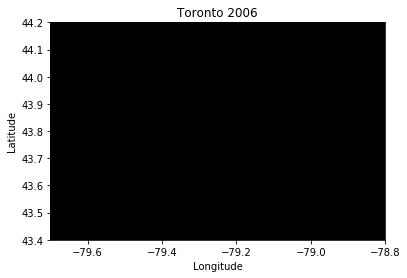

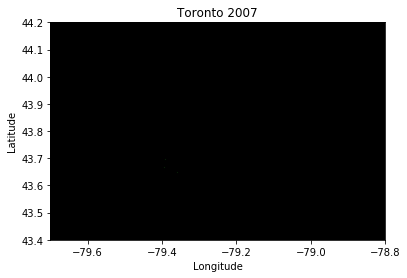

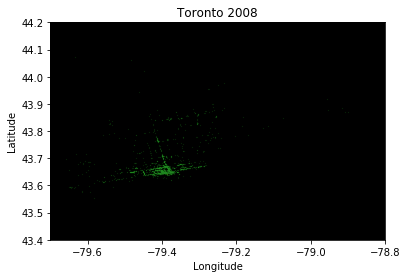

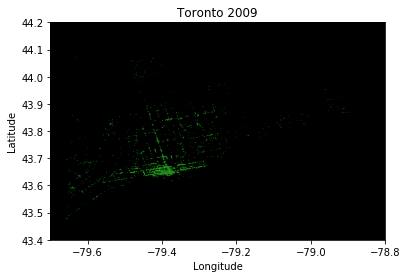

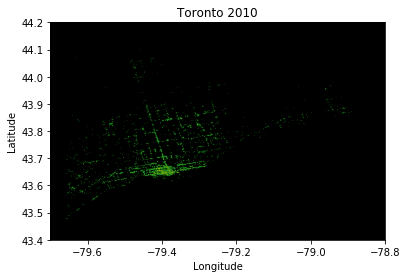

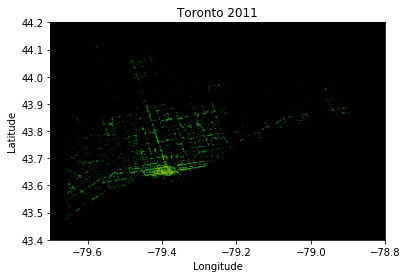

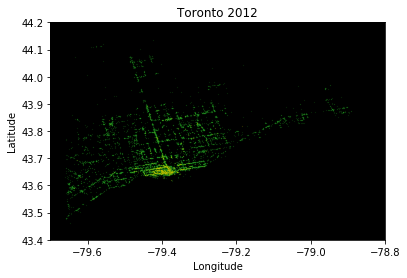

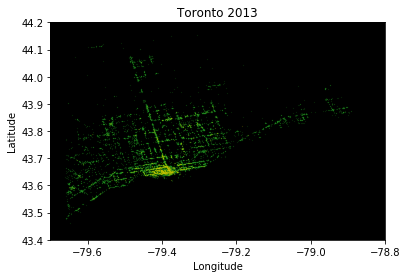

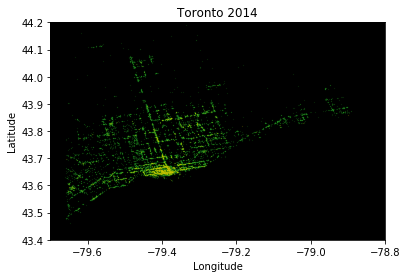

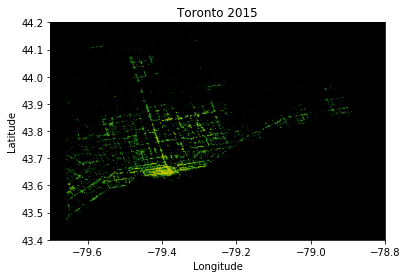

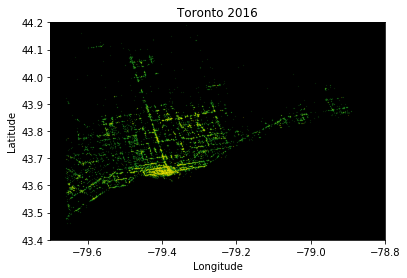

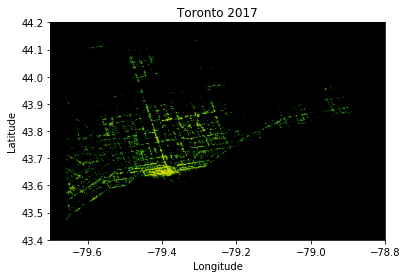

In [22]:
# TORONTO

count = 2006
for newTorontoYear in newTorontoReviewsAgg:
    rating_TorontoData1 = newTorontoYear[newTorontoYear['popularity']<10]
    rating_TorontoData2 = newTorontoYear[(newTorontoYear['popularity']<100) & (newTorontoYear['popularity']>=10)]
    rating_TorontoData3 = newTorontoYear[(newTorontoYear['popularity']<500) & (newTorontoYear['popularity']>=100)]
    rating_TorontoData4 = newTorontoYear[newTorontoYear['popularity']>=1000]
    torontoRatingArrayOverall = [rating_TorontoData1,rating_TorontoData2,rating_TorontoData3,rating_TorontoData4]
    makeYearlyMaps(36.207430,-115.268460,torontoRatingArrayOverall,"Toronto",count)
    count+=1

/opt/condaenvs/jupyterhub/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/opt/condaenvs/jupyterhub/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/opt/condaenvs/jupyterhub/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/opt/condaenvs/jupyterhub/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/opt/condaenvs/jupyterhub/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is curre

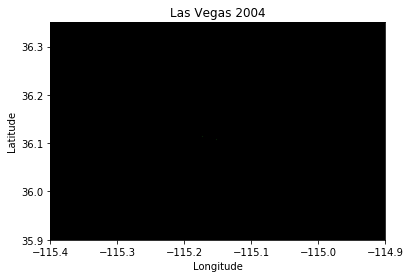

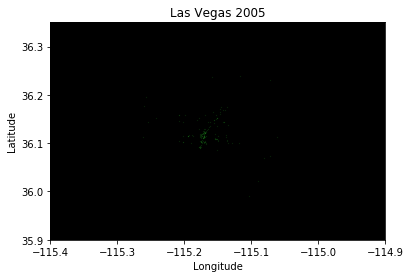

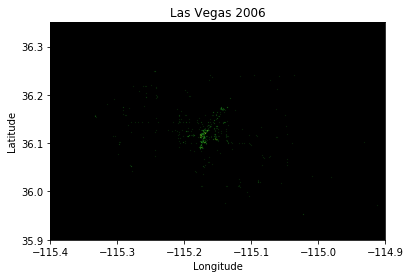

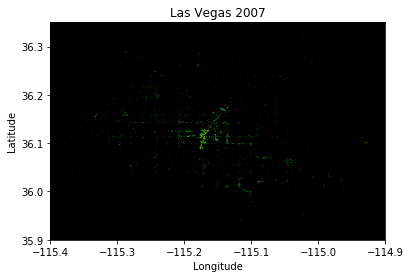

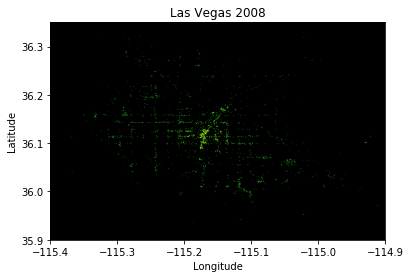

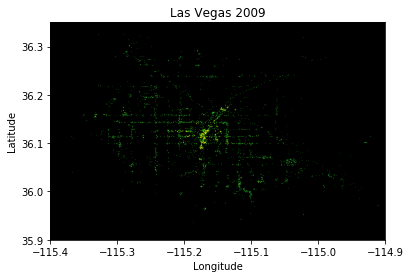

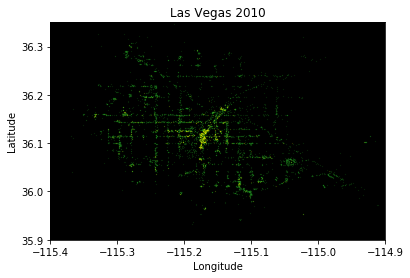

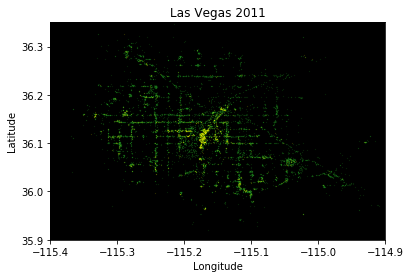

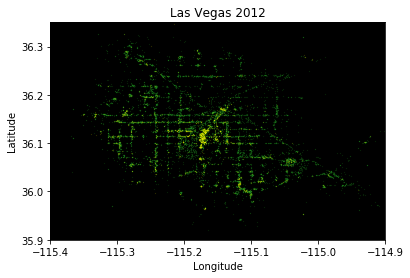

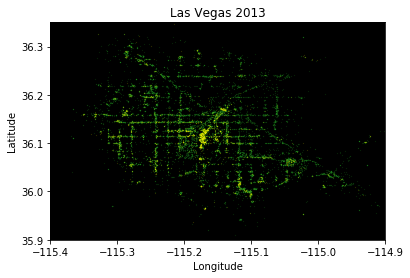

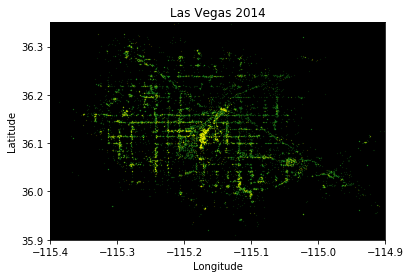

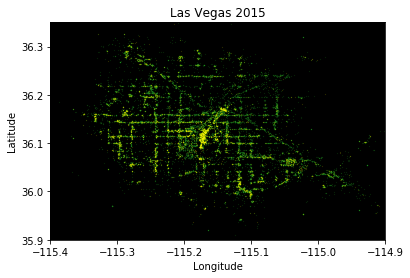

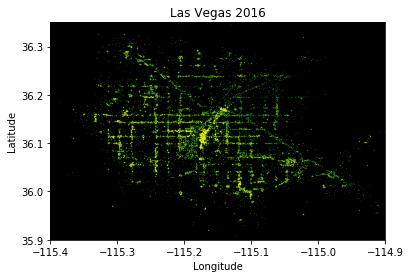

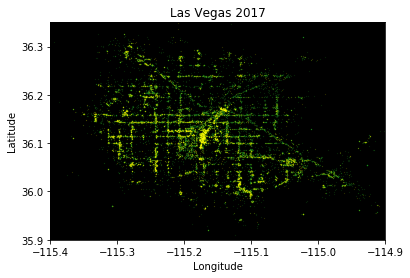

In [23]:
# VEGAS

count = 2004
for newVegasYear in newVegasReviewsAgg:
    rating_VegasData1 = newVegasYear[newVegasYear['popularity']<10]
    rating_VegasData2 = newVegasYear[(newVegasYear['popularity']<100) & (newVegasYear['popularity']>=10)]
    rating_VegasData3 = newVegasYear[(newVegasYear['popularity']<500) & (newVegasYear['popularity']>=100)]
    rating_VegasData4 = newVegasYear[newVegasYear['popularity']>=1000]
    vegasRatingArrayOverall = [rating_VegasData1,rating_VegasData2,rating_VegasData3,rating_VegasData4]
    makeYearlyMaps(36.207430,-115.268460,vegasRatingArrayOverall,"Las Vegas",count)
    count+=1